# Not Too Crazy Cap Table Math
- Author: James Behzadi (Co-founder of [kintell.com](https://kintell.com/advisors/james-behzadi/not-too-crazy-cap-table-math))
- To understand the code, I recommend watching this video first (link [here](https://youtu.be/Dk6JNTDec9I)).
- This code handles up to six Safes. It also scales to as many Safes you need. If you found a bug :) or needed some help with the code, get in touch [here](https://kintell.com/advisors/james-behzadi/not-too-crazy-cap-table-math).
- To test the code I have included two examples from Y Combinator's Safe User Guide document (link [here](https://www.ycombinator.com/documents/)).

## Disclaimer:
- I am not taking any responsibility for you using this. I only share this with an educational mindset on an 'as it is' basis to help founders to get their head around cap table math.

## How to run this code?
- First you need to run the last cell to import all the libraries and warm up the code.
- Then you can go through the examples one by one.

## Flat ESOP Examples
---
### Example 1 (low valuation)
Let's do a very basic example to understand the math better. Let's imagine a company that is not going to do any hiring (so no ESOP increase after priced round) and has two SAFE investors and one priced round investor. In reality, this is very unlikely to happen, but it's a hypothetical situation that helps to understand the math better.

- 10m shares prior to Safes (with 5% in ESOP pool)
- Investor A: 100k @ 5m Safe cap, no pro rata
- Investor B: 100k @ 10m Safe cap, no pro rata
- Investor C: 1m @ 5m priced round (no ESOP increase)

Rough math: Prior to priced round, investors A and B hold 2% and 1% stake respectively. After this priced round, investor A will still hold their 2%, but investor B's stake grows to 2% due to downround.

Series Seed price per share ($) =  0.37999999999999867
Company Capitalisation (fully-diluted) =  13157894.736842116
Founders % Reduction =  27.800000000000058
Total Safe Raise =  200000.0
Total Pre-seed Raise =  200000.0


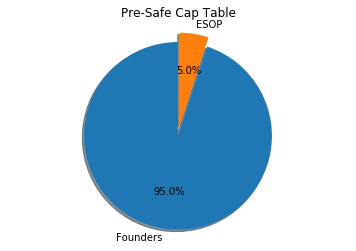

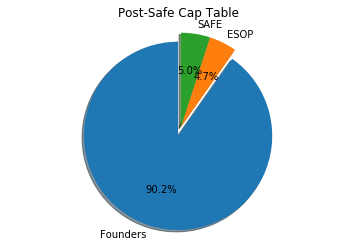

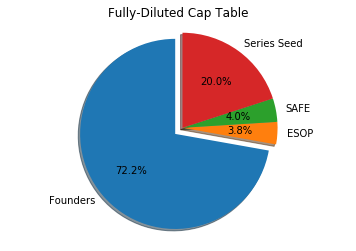

,Entity,Raise,Valuation,Discount %,Pre-SAFE %,Post-SAFE %,SAFE Shares,Conversion,Pro Rata,Final Shares,Fully-Diluted %
0,Safe A,100000,5000000,0,0.0,2.50,2.631579e+05,Seed price,False,2.631579e+05,2.0
1,Safe B,100000,10000000,0,0.0,2.50,2.631579e+05,Seed price,False,2.631579e+05,2.0
2,Safe C,0,0,0,0.0,0.00,0.000000e+00,-,False,0.000000e+00,0.0
3,Safe D,0,0,0,0.0,0.00,0.000000e+00,-,False,0.000000e+00,0.0
4,Safe E,0,0,0,0.0,0.00,0.000000e+00,-,False,0.000000e+00,0.0
5,Safe F,0,0,0,0.0,0.00,0.000000e+00,-,False,0.000000e+00,0.0
6,Series Seed,1e+06,5000000,-,0.0,0.00,0.000000e+00,-,-,2.631579e+06,20.0
7,Early Hires,-,-,-,5.0,4.75,5.000000e+05,-,-,5.000000e+05,3.8
8,Options Available,-,-,-,0.0,0.00,0.000000e+00,-,-,0.000000e+00,0.0
9,Founders,-,-,-,95.0,90.25,9.500000e+06,-,-,9.500000e+06,72.2


In [2]:
# Model inputs
safeRaise = [100e3, 100e3, 0, 0, 0, 0]
safeCap = [5e6, 10e6, 0, 0, 0, 0]
safeDiscountPer100 = [0, 0, 0, 0, 0, 0]
safeProRata = [False, False, False, False, False, False]
safeTotalProRata = [0, 0, 0, 0, 0, 0]
safeData = [safeRaise, safeCap, safeDiscountPer100, safeProRata, safeTotalProRata]

dic = {
    'raiseA' : 1e6,
    'preM' : 4e6,
    'newEsopPer100' : 0,
    'earlyHiresPer100' : 5,
    'preSafeShares' : 10e6,
    'preSafeESOP' : 0,  # promised options
    'debtRaise' : 0,
    'safeData' : safeData
}

capTable, df, _ = capTableMath(dic, True); df

## Flat ESOP Examples
---
### Example 2 (medium valuation)
Now let's say priced round happens at 10m. Investor C's stake will be 10% fully diluted, therefore this dilutes investor A down from 2% to 1.8%, i.e. 10% of 2% = 0.2%. Note that Investor B will end up with 1% fully diluted because priced round happens exactly on the mark of 10m.

Series Seed price per share ($) =  0.8720202020202001
Company Capitalisation (fully-diluted) =  11467624.232595855
Founders % Reduction =  17.158080808080822
Total Safe Raise =  200000.0
Total Pre-seed Raise =  200000.0


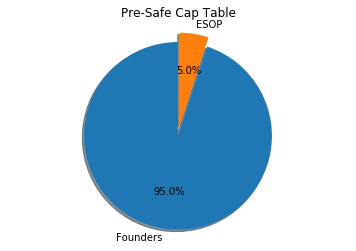

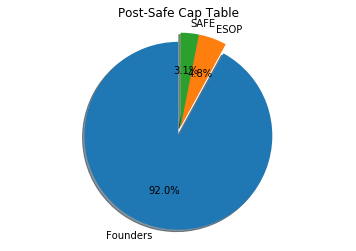

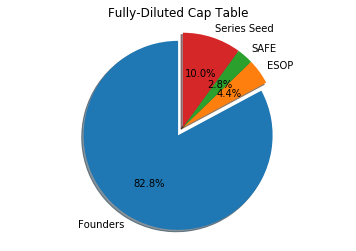

,Entity,Raise,Valuation,Discount %,Pre-SAFE %,Post-SAFE %,SAFE Shares,Conversion,Pro Rata,Final Shares,Fully-Diluted %
0,Safe A,100000,5000000,0,0.0,1.997755,2.061856e+05,Safe price,False,2.061856e+05,1.797980
1,Safe B,100000,10000000,0,0.0,1.111111,1.146762e+05,Seed price,False,1.146762e+05,1.000000
2,Safe C,0,0,0,0.0,0.000000,0.000000e+00,-,False,0.000000e+00,0.000000
3,Safe D,0,0,0,0.0,0.000000,0.000000e+00,-,False,0.000000e+00,0.000000
4,Safe E,0,0,0,0.0,0.000000,0.000000e+00,-,False,0.000000e+00,0.000000
5,Safe F,0,0,0,0.0,0.000000,0.000000e+00,-,False,0.000000e+00,0.000000
6,Series Seed,1000000,10000000,-,0.0,0.000000,0.000000e+00,-,-,1.146762e+06,10.000000
7,Early Hires,-,-,-,5.0,4.844557,5.000000e+05,-,-,5.000000e+05,4.360101
8,Options Available,-,-,-,0.0,0.000000,0.000000e+00,-,-,0.000000e+00,0.000000
9,Founders,-,-,-,95.0,92.046577,9.500000e+06,-,-,9.500000e+06,82.841919


In [3]:
dic['preM'] = 9e6
capTable, df, _ = capTableMath(dic, True); df

## Flat ESOP Examples
---
### Example 3 (high valuation)
Now let's say priced round happens at 20m. Investor C's stake will be 5% fully diluted which dilutes both investors A and B by 5%: 

- Investor A's 2% will go down to 1.9%, i.e. 5% of 2% = 0.1%. 
- Investor B's 1% will go down to 0.95%, i.e. 5% of 1% = 0.05%.

Series Seed price per share ($) =  1.8429999999999975
Company Capitalisation (fully-diluted) =  10851871.947911017
Founders % Reduction =  12.457500000000021
Total Safe Raise =  200000.0
Total Pre-seed Raise =  200000.0


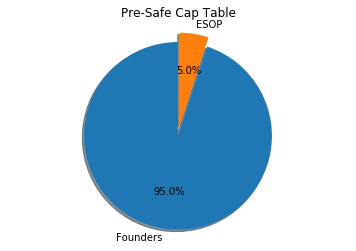

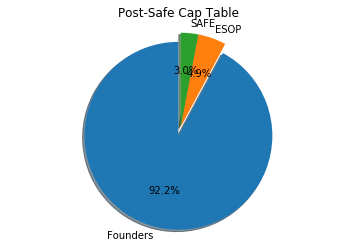

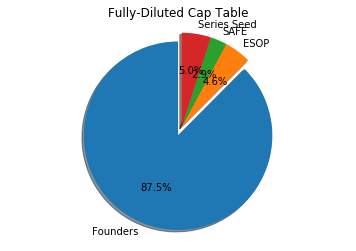

,Entity,Raise,Valuation,Discount %,Pre-SAFE %,Post-SAFE %,SAFE Shares,Conversion,Pro Rata,Final Shares,Fully-Diluted %
0,Safe A,100000,5000000,0,0.0,2.00,2.061856e+05,Safe price,False,2.061856e+05,1.9000
1,Safe B,100000,10000000,0,0.0,1.00,1.030928e+05,Safe price,False,1.030928e+05,0.9500
2,Safe C,0,0,0,0.0,0.00,0.000000e+00,-,False,0.000000e+00,0.0000
3,Safe D,0,0,0,0.0,0.00,0.000000e+00,-,False,0.000000e+00,0.0000
4,Safe E,0,0,0,0.0,0.00,0.000000e+00,-,False,0.000000e+00,0.0000
5,Safe F,0,0,0,0.0,0.00,0.000000e+00,-,False,0.000000e+00,0.0000
6,Series Seed,1e+06,20000000,-,0.0,0.00,0.000000e+00,-,-,5.425936e+05,5.0000
7,Early Hires,-,-,-,5.0,4.85,5.000000e+05,-,-,5.000000e+05,4.6075
8,Options Available,-,-,-,0.0,0.00,0.000000e+00,-,-,0.000000e+00,0.0000
9,Founders,-,-,-,95.0,92.15,9.500000e+06,-,-,9.500000e+06,87.5425


In [4]:
dic['preM'] = 19e6
capTable, df, _ = capTableMath(dic, True); df

## YC Examples
---
### Example 4 - YC's Conversion at SAFE Price
Example 1 (item 2) of Appendix II of YC SAFE User Guide (page 18, link [here](https://www.ycombinator.com/documents/))

- 10m shares prior to Safes with 750k in the pool (allocated and promissed)
- Investor A: 200k @ 4m Safe cap, no pro rata
- Investor B: 800k @ 8m Safe cap, yes pro rata
- Series A: 5m @ 15m pre-money with 10% increase to the ESOP
- Both SAFEs convert at Safe price as the post-money valuation is far enough from the SAFE caps

Series Seed price per share ($) =  1.1144730206757436
Company Capitalisation (fully-diluted) =  17945701.357466064
Founders % Reduction =  48.455622793746855
Total Safe Raise =  1000000.0
Total Pre-seed Raise =  1000000.0


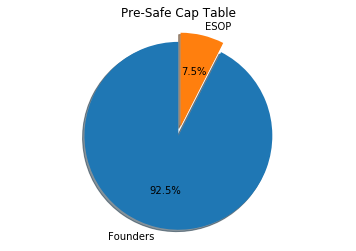

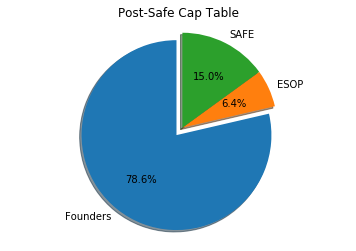

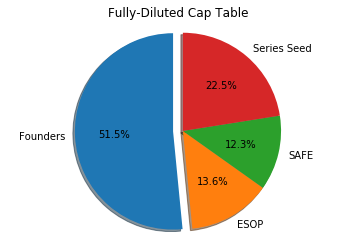

,Entity,Raise,Valuation,Discount %,Pre-SAFE %,Post-SAFE %,SAFE Shares,Conversion,Pro Rata,Final Shares,Fully-Diluted %
0,Safe A,200000,4000000,0,0.0,5.000,5.882353e+05,Safe price,False,5.882353e+05,3.277862
1,Safe B,800000,8000000,0,0.0,10.000,1.176471e+06,Safe price,True,1.625113e+06,9.055724
2,Safe C,0,0,0,0.0,0.000,0.000000e+00,-,False,0.000000e+00,0.000000
3,Safe D,0,0,0,0.0,0.000,0.000000e+00,-,False,0.000000e+00,0.000000
4,Safe E,0,0,0,0.0,0.000,0.000000e+00,-,False,0.000000e+00,0.000000
5,Safe F,0,0,0,0.0,0.000,0.000000e+00,-,False,0.000000e+00,0.000000
6,Series Seed,4500000,20000000,-,0.0,0.000,0.000000e+00,-,-,4.037783e+06,22.500000
7,Early Hires,-,-,-,6.5,5.525,6.500000e+05,-,-,6.500000e+05,3.622037
8,Options Available,-,-,-,1.0,0.850,1.000000e+05,-,-,1.794570e+06,10.000000
9,Founders,-,-,-,92.5,78.625,9.250000e+06,-,-,9.250000e+06,51.544377


In [5]:
# Model inputs
safeRaise = [200e3, 800e3, 0, 0, 0, 0]
safeCap = [4e6, 8e6, 0, 0, 0, 0]
safeDiscountPer100 = [0, 0, 0, 0, 0, 0]
safeProRata = [False, True, False, False, False, False]
safeTotalProRata = [0, 0, 0, 0, 0, 0]
safeData = [safeRaise, safeCap, safeDiscountPer100, safeProRata, safeTotalProRata]

dic = {
    'raiseA' : 5e6,
    'preM' : 15e6,
    'newEsopPer100' : 10,
    'earlyHiresPer100' : 6.5,
    'preSafeShares' : 10e6,
    'preSafeESOP' : 100e3,  # promised options
    'debtRaise' : 0,
    'safeData' : safeData
}

capTable, df, _ = capTableMath(dic, True); df

## YC Examples
---
### Example 5 - YC's Conversion at higer price
Example 1 (item 5) of Appendix II (page 21, link [here](https://www.ycombinator.com/documents/))

- Series Seed: 2.2m @ 8.8m pre-money with 10% increase to the ESOP
- Post-money valuation of the priced round is too close to one of the safe caps
- One of the SAFEs converts at the Safe price and the other one at Seed round price per share

Series Seed price per share ($) =  0.6578799775659001
Company Capitalisation (fully-diluted) =  16720375.106564367
Founders % Reduction =  44.67827461377658
Total Safe Raise =  1000000.0
Total Pre-seed Raise =  1000000.0


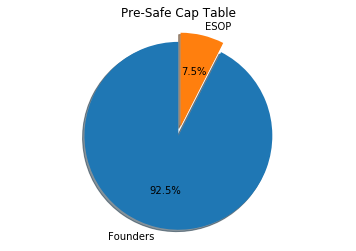

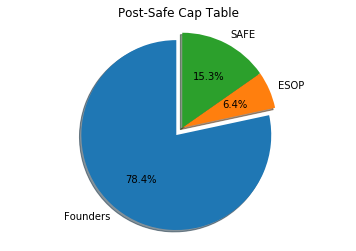

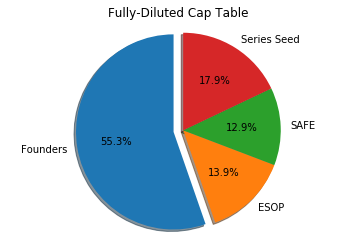

,Entity,Raise,Valuation,Discount %,Pre-SAFE %,Post-SAFE %,SAFE Shares,Conversion,Pro Rata,Final Shares,Fully-Diluted %
0,Safe A,200000,4000000,0,0.0,4.983245,5.882353e+05,Safe price,False,5.882353e+05,3.518075
1,Safe B,800000,8000000,0,0.0,10.301595,1.216027e+06,Seed price,True,1.560520e+06,9.333046
2,Safe C,0,0,0,0.0,0.000000,0.000000e+00,-,False,0.000000e+00,0.000000
3,Safe D,0,0,0,0.0,0.000000,0.000000e+00,-,False,0.000000e+00,0.000000
4,Safe E,0,0,0,0.0,0.000000,0.000000e+00,-,False,0.000000e+00,0.000000
5,Safe F,0,0,0,0.0,0.000000,0.000000e+00,-,False,0.000000e+00,0.000000
6,Series Seed,1.97336e+06,11000000,-,0.0,0.000000,0.000000e+00,-,-,2.999582e+06,17.939681
7,Early Hires,-,-,-,6.5,5.506485,6.500000e+05,-,-,6.500000e+05,3.887473
8,Options Available,-,-,-,1.0,0.847152,1.000000e+05,-,-,1.672038e+06,10.000000
9,Founders,-,-,-,92.5,78.361524,9.250000e+06,-,-,9.250000e+06,55.321725


In [6]:
dic['raiseA'] = 2.2e6; dic['preM'] = 8.8e6
_, df, _ = capTableMath(dic, True); df

---
## Some boring functions to do the math & graphs
- First run the following cell and then the ones at the top :)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import OrderedDict
import numpy as np
from scipy.optimize import fsolve

def capTableMath(dic, verbose):
    
    # update computed values
    computedVals(dic)
    
    # iterative calculation of Series Seed price per share
    data = dic['raiseA'], dic['postM'], dic['esopVal'], dic['preSafeESOP'], dic['preSafeShares'], dic['safeData'], False
    tmp = fsolve(f, .8, args=data)
    sAprice = tmp[0]
    
    # Now do the calculations one last time to get the final shares
    data = dic['raiseA'], dic['postM'], dic['esopVal'], dic['preSafeESOP'], dic['preSafeShares'], dic['safeData'], True
    _, df, finalCap, safeSharesTot, esopShares = f(sAprice, *data)
    
    # some var defs
    safeRaise, _, _, _, _ = dic['safeData']
    nSafes = len(safeRaise)
    preSafeCap = dic['preSafeShares']
    postSafeCap = preSafeCap + safeSharesTot
    a4 = dic['earlyHiresShares']
    a5a = dic['preSafeESOP']; a5b = esopShares
    a6 = dic['foundersShares']
    df.loc[df.Entity == 'Series Seed', 'Raise'] = sAprice * df.loc[df.Entity == 'Series Seed', 'Final Shares']
    df.loc[df.Entity == 'Series Seed', 'Valuation'] = dic['postM']
    df.loc[nSafes+1] = ['Early Hires', '-', '-', '-', a4/preSafeCap*100, a4/postSafeCap*100, 
                        a4, '-', '-', a4, a4/finalCap*100]
    df.loc[nSafes+2] = ['Options Available', '-', '-', '-', a5a/preSafeCap*100, a5a/postSafeCap*100, 
                        a5a, '-', '-', a5b, a5b/finalCap*100]
    df.loc[nSafes+3] = ['Founders', '-', '-', '-', a6/preSafeCap*100, a6/postSafeCap*100, 
                        a6, '-', '-', a6, a6/finalCap*100]
    df.loc[nSafes+4] = ['Total', '-', '-', '-', sum(df['Pre-SAFE %'].iloc[0:nSafes+4]), \
                        sum(df['Post-SAFE %'].iloc[0:nSafes+4]), 
                        sum(df['SAFE Shares'].iloc[0:nSafes+4]), '-', '-',
                        sum(df['Final Shares'].iloc[0:nSafes+4]), 
                        sum(df['Fully-Diluted %'].iloc[0:nSafes+4])
                       ]
    
    capTablePreSafe = capTableBuilder(df, nSafes, 'SAFE Shares', preSafeCap)
    capTablePostSafe = capTableBuilder(df, nSafes, 'SAFE Shares', postSafeCap)
    capTableSeed = capTableBuilder(df, nSafes, 'Final Shares', finalCap)
    
    foundersDilution = 100*(1 - dic['foundersShares'] / finalCap)
    if verbose:
        print('Series Seed price per share ($) = ', sAprice)
        print('Company Capitalisation (fully-diluted) = ', finalCap)
        print('Founders % Reduction = ', foundersDilution)
        print('Total Safe Raise = ', sum(safeRaise))
        print('Total Pre-seed Raise = ', sum(safeRaise)+dic['debtRaise'])

        pieChartPlotter(capTablePreSafe, 'preSafe')
        pieChartPlotter(capTablePostSafe, 'postSafe')
        pieChartPlotter(capTableSeed, 'seed')
    
    return capTableSeed, df, foundersDilution

def capTableBuilder(df, nSafes, colName, cap):
    capTable = {
        "safes" : (
            df.iloc[0][colName] + df.iloc[1][colName] + df.iloc[2][colName] +
            df.iloc[3][colName] + df.iloc[4][colName] + df.iloc[5][colName]) / cap,
        "sA" : df.iloc[nSafes][colName] / cap,
        "esop" : (df.iloc[nSafes+1][colName] + df.iloc[nSafes+2][colName]) / cap,
        "founders" : df.iloc[nSafes+3][colName] / cap
    }
    return capTable

def pieChartPlotter(capTable, roundName):
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    if roundName == 'preSafe':
        labels = 'Founders', 'ESOP'
        sizes = [capTable['founders'], capTable['esop']]
        explode = (0.1, 0)
        jTitle = 'Pre-Safe Cap Table'
    elif roundName == 'postSafe':
        labels = 'Founders', 'ESOP', 'SAFE'
        sizes = [capTable['founders'], capTable['esop'], capTable['safes']]
        explode = (0.1, 0, 0)
        jTitle = 'Post-Safe Cap Table'
    elif roundName == 'seed':
        labels = 'Founders', 'ESOP', 'SAFE', 'Series Seed'
        sizes = [capTable['founders'], capTable['esop'], capTable['safes'], capTable['sA']]
        explode = (0.1, 0, 0, 0)
        jTitle = 'Fully-Diluted Cap Table'

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(jTitle)

    plt.show()
    
def computedVals(dic):
    dic['postM'] = dic['raiseA'] + dic['preM']
    dic['esopVal'] = dic['newEsopPer100']/100 * dic['postM']
    dic['foundersShares'] = (1-dic['earlyHiresPer100']/100) * dic['preSafeShares'] - dic['preSafeESOP']
    dic['earlyHiresShares'] = dic['earlyHiresPer100']/100 * dic['preSafeShares']
    return

def f(sAprice, *dataIn):
    raiseA, postM, esopVal, preSafeESOP, preSafeShares, safeData, dfYes = dataIn  # automatic unpacking
    
    df, safeSharesTot = safeCalcs(sAprice, preSafeShares, *safeData)
    
    postSafeCap = preSafeShares + safeSharesTot
    sAshares = raiseA / sAprice
    esopShares = esopVal / sAprice
    finalCap = postSafeCap + (esopShares - preSafeESOP) + sAshares
    
    # pro rata calcs
    df = proRataCalcs(sAprice, df, sAshares, finalCap, *safeData)
        
    expectedSeriesAper100 = raiseA / postM
    trueSeriesAper100 = sAshares / finalCap
    dif = trueSeriesAper100 - expectedSeriesAper100
    
    if dfYes:
        out = dif, df, finalCap, safeSharesTot, esopShares
    else:
        out = dif

    return out

def safeCalcs(sAprice, preSafeShares, *safeData):
    safeRaise, safeCap, safeDiscountPer100, safeProRata, safeTotalProRata = safeData
        
    expectedSafePer100Tot = 0; expectedSafePer100 = []
    discountSharesTot = 0; discountShares = []
    for i in range(len(safeRaise)):
        expectedSafePer100.append(0)
        discountShares.append(0)
        if safeCap[i] > 0:     # SAFEs with valuation cap
            expectedSafePer100[i] = safeRaise[i] / safeCap[i] * 100
        else:                  # SAFEs with discount only
            discountShares[i] = safeRaise[i] / (sAprice * (1-safeDiscountPer100[i]/100))
        expectedSafePer100Tot = expectedSafePer100Tot + expectedSafePer100[i]
        discountSharesTot = discountSharesTot + discountShares[i]
    
    postSafeSharesTmp = (preSafeShares + discountSharesTot) / (1 - expectedSafePer100Tot/100)
    
    safeShares = []; convMethod = []
    for i in range(len(safeRaise)):
        safeShares.append(0); convMethod.append(' ')
        if safeCap[i] > 0:     # SAFEs with valuation cap
            convMethod[i], safeShares[i] = getSafeMethod(sAprice, safeCap[i], safeRaise[i], 
                                                         safeDiscountPer100[i], postSafeSharesTmp)
        else:                  # SAFEs with discount only
            safeShares[i] = discountShares[i]
            if safeDiscountPer100[i] == 0:
                convMethod[i] = '-'
            else:
                convMethod[i] = 'Discount only'
    
    # accounting for conversion at non-safe price
    nonSafePriceSahres = 0
    for i in range(len(safeRaise)):
        if convMethod[i] == 'S-A price':
            nonSafePriceSahres = nonSafePriceSahres + safeShares[i]
    if nonSafePriceSahres > 0:
        for i in range(len(safeRaise)):
            if convMethod[i] == 'Safe price':
                safeShares[i] = (preSafeShares + discountSharesTot + nonSafePriceSahres) * \
                expectedSafePer100[i]/100 / (1 - expectedSafePer100[i]/100)
    
    # summing it all up
    safeSharesTot = 0
    for i in range(len(safeRaise)):
        safeSharesTot = safeSharesTot + safeShares[i]
    postSafeShares = preSafeShares + safeSharesTot
        
    df = pd.DataFrame(OrderedDict((
        ('Entity', ['Safe A', 'Safe B', 'Safe C', 'Safe D', 'Safe E', 'Safe F']),
        ('Raise', [safeRaise[0], safeRaise[1], safeRaise[2], safeRaise[3], safeRaise[4], safeRaise[5]]),
        ('Valuation', [safeCap[0], safeCap[1], safeCap[2], safeCap[3], safeCap[4], safeCap[5]]),
        ('Discount %', [safeDiscountPer100[0], safeDiscountPer100[1], safeDiscountPer100[2], 
                        safeDiscountPer100[3], safeDiscountPer100[4], safeDiscountPer100[5]]),
        ('Pre-SAFE %', [0, 0, 0, 0, 0, 0]),
        ('Post-SAFE %', [safeShares[0]/postSafeShares*100, safeShares[1]/postSafeShares*100, 
                         safeShares[2]/postSafeShares*100, safeShares[3]/postSafeShares*100, 
                         safeShares[4]/postSafeShares*100, safeShares[5]/postSafeShares*100]),
        ('SAFE Shares', [safeShares[0], safeShares[1], safeShares[2], safeShares[3], safeShares[4], 
                         safeShares[5]]),
        ('Conversion', [convMethod[0], convMethod[1], convMethod[2], convMethod[3], convMethod[4], 
                        convMethod[5]]),
        ('Pro Rata', [safeProRata[0], safeProRata[1], safeProRata[2], safeProRata[3], safeProRata[4], 
                      safeProRata[5]])
        )))
    return df, safeSharesTot

def getSafeMethod(
    sAprice, safeCap, safeRaise, safeDiscountPer100, postSafeSharesTmp
):
    shareMethod1 = safeRaise / safeCap * postSafeSharesTmp
    shareMethod2 = safeRaise / (sAprice * (1-safeDiscountPer100/100))

    if shareMethod1 > shareMethod2:
        convMethod = 'Safe price'
        safeShares = shareMethod1
    else:
        convMethod = 'Seed price'
        safeShares = shareMethod2
    
    return convMethod, safeShares     

def proRataCalcs(sAprice, df, sAsharesTot, finalCap, *safeData):
    
    safeRaise, safeCap, safeDiscountPer100, safeProRata, safeTotalProRata = safeData
    
    sAshares = []
    proRataSharesTot = 0
    for i in range(len(safeRaise)):
        sAshares.append(0)
        postSAFEper100 = df.iloc[i]['Post-SAFE %']
        safeShares = df.iloc[i]['SAFE Shares']
        if safeProRata[i]:
            proRataShares = postSAFEper100/100 * sAsharesTot
            if safeTotalProRata[i] > 0:
                proRataShares_tmp = safeTotalProRata[i] / (sAprice * (1-safeDiscountPer100[i]/100))
                proRataShares = max(proRataShares, proRataShares_tmp)
        else:
            proRataShares = 0
        sAshares[i] = safeShares + proRataShares
        proRataSharesTot = proRataSharesTot + proRataShares
    
    sAshares_seed = sAsharesTot - proRataSharesTot

    df.loc[len(safeRaise)] = ['Series Seed', '-', '-', '-', 0, 0, 0, '-', '-']
    df['Final Shares'] = [sAshares[0], sAshares[1], sAshares[2], sAshares[3], sAshares[4], sAshares[5], 
                          sAshares_seed]
    df['Fully-Diluted %'] = [sAshares[0]/finalCap*100, sAshares[1]/finalCap*100, sAshares[2]/finalCap*100, 
                             sAshares[3]/finalCap*100, sAshares[4]/finalCap*100, sAshares[5]/finalCap*100, 
                             sAshares_seed/finalCap*100]
    
    return df


def valuationSensitivity(dic, raiseA, newEsopPer100, title):
    dic['raiseA'] = raiseA
    dic['newEsopPer100'] = newEsopPer100
    founders = []; sA = []; postM = []; foundersDilution = []
    x = range(10, 20)
    for preM in x:
        dic['preM'] = preM * 1e6
        capTable, _, temp = capTableMath(dic, False)
        founders.append(capTable['founders']*100)
        sA.append(capTable['sA']*100)
        postM.append(dic['postM']/1e6)
        foundersDilution.append(temp)

    # data
    df = pd.DataFrame(OrderedDict(
        (('post-money', postM), ('% founders', founders), ('% series-Seed', sA), ('% reduction', foundersDilution))))
    plotter(df, 'post-money', 'Post Money Valuation (milion $)', title)

    return df

def raiseSensitivity(dic, preM, newEsopPer100, title):
    dic['preM'] = preM
    dic['newEsopPer100'] = newEsopPer100
    founders = []; sA = []; raiseA = []; foundersDilution = []
    x = np.arange(2.5, 5.2, .25)
    for raiseA in x:
        dic['raiseA'] = raiseA * 1e6
        capTable, _, temp = capTableMath(dic, False)
        founders.append(capTable['founders']*100)
        sA.append(capTable['sA']*100)
        foundersDilution.append(temp)

    # data
    df = pd.DataFrame({'Seed Raise': x, '% founders': founders, '% series-Seed': sA, '% reduction' : foundersDilution})
    plotter(df, 'Seed Raise', 'Series Seed raise (milion $)', title)

    return df

def plotter(df, x, xlabel, title):
    # multiple line plot
    plt.plot( x, '% founders', data=df, marker='o', markerfacecolor='yellow', markersize=12, color='blue', linewidth=4)
    plt.plot( x, '% series-Seed', data=df, marker='o', markerfacecolor='skyblue', markersize=12, color='pink', linewidth=4)
#     plt.plot( x, '% reduction', data=df, marker='o', markerfacecolor='grey', markersize=12, color='lightgrey', linewidth=4)
    plt.legend(loc='center right')
    plt.grid(b=True, which='major', color='grey', linestyle='--')
    plt.xlabel(xlabel)
    plt.ylabel('%')
    plt.title(title)
    plt.show()
    return